In [1]:
import numpy as np
import os  # For Saving to Folder
import pandas as pd
import matplotlib.pyplot as plt
import socket
import os as os
import sys as sys
import multiprocessing as mp
import itertools as it
from time import time
from scipy.spatial.distance import pdist

# For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']
from matplotlib import gridspec
#plt.style.use('ggplot') #..../whitegrid.mplstyle  # Nice Plotting Style

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/punic_aDNA/"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version)

compute-e-16-235.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/punic_aDNA
CPU Count: 28
3.7.4 (default, Sep 11 2019, 11:24:51) 
[GCC 6.2.0]


### ROH Panel is plotted over in './plot_roh_paper.ipynb'

### Load Inigos Relatedness Estimates

In [2]:
df = pd.read_csv("/n/groups/reich/hringbauer/git/punic_aDNA/data/rel_T774.tsv", sep="\t")

label = df["Ind1"] + "-" + df["Ind2"]


y = np.arange(len(label))

df = df.reset_index() # to get index as col

### Create IBD-reatledness info for plot
dfr = pd.DataFrame({"Ind1":["I18201", "I18199","I18199"], 
              "Ind2":["I18203", "I18203","I18201"], 
              "rel":[5, 3,4],
              "rel_s":["^", "<", ">"]})

df1 = pd.merge(dfr, df[["Ind1","Ind2", "index", "r"]], on=["Ind1","Ind2"], how="left")

In [94]:
df1

,Ind1,Ind2,rel,rel_s,index,r
0,I18199,I18203,3,o,3,0.200366
1,I18199,I18201,4,s,1,0.171437
2,I18201,I18203,5,d,8,0.118329


Saved to: /n/groups/reich/hringbauer/git/punic_aDNA/figures/T774/rel.v1.pdf


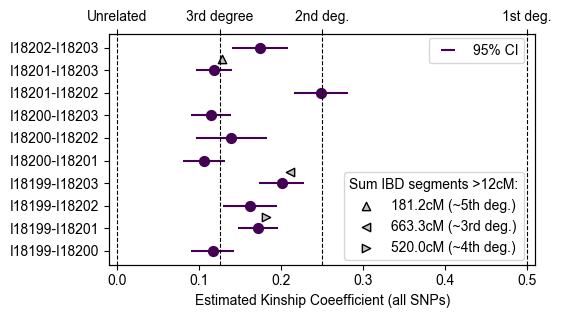

In [143]:
c = "#440154"
c1 = "silver"

savepath="/n/groups/reich/hringbauer/git/punic_aDNA/figures/T774/rel.v1.pdf"

ts = [0, 0.125, 0.25, 0.5]
ds = ["Unrelated", "3rd degree", "2nd deg.", "1st deg."]

plt.figure(figsize=(5.5,3))
ax = plt.gca()

ax.errorbar(df["r"], y, xerr=1.96*df["SE.r"],  fmt='none', c=c, label="95% CI")
ax.scatter(df["r"], y, c=c, s=50)

for t in ts:
    ax.axvline(t, c="k", lw=0.8, ls="--")
    
#ax2 = ax.secondary_xaxis('top')
ax2 = ax.twiny()
ax2.xaxis.set_ticks_position("top")
#ax2.tick_params(axis='x', color='#21918c')
ax2.set_xticks(ts, minor=False)
ax2.set_xticklabels(ds)


ax.set_yticks(y)
ax.set_yticklabels(label)


ax.set_xlabel("Estimated Kinship Coeefficient (all SNPs)")
ax.set_xlim([-0.01,0.51])
ax2.set_xlim([-0.01,0.51])

leg1 = ax.legend(loc="upper right", bbox_to_anchor=(0.99, 1.01),)

### Plot relatedness info
ls = [ax.scatter(df1["r"][i]+0.01, df1["index"][i]+0.5, marker = df1["rel_s"][i], c=c1, ec="k") 
          for i in range(len(df1))]

#ls = [ax.annotate(str(i+1), (df1["r"][i]+0.01, df1["index"][i]+0.5), c=c1, label=str(i)) 
#          for i in range(len(df1))]


legs = ["181.2cM (~5th deg.)", "663.3cM (~3rd deg.)", "520.0cM (~4th deg.)"]

leg = ax.legend(ls, legs, fontsize=10, bbox_to_anchor=(0.99, -0.01),
          loc="lower right", title=f"Sum IBD segments >12cM:")

ax.add_artist(leg1)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")

plt.show()